<a href="https://colab.research.google.com/github/MMBAYAR/IPG23/blob/main/G%C3%B6zetimli_%C3%B6%C4%9Frenme_Regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ppscore

import ppscore as pps

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 12

# plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.serif'] = ['Times New Roman']

plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [4]:
df = pd.read_csv( '/content/Auto(refurbished).csv' )

In [5]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford
393,44.0,4,97.0,52.0,2130,24.6,82,2,volkswagen
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford


In [42]:
list(df.make.unique())

7

In [43]:
df.make = [ list(df.make.unique()).index(i) for i in df.make ]

In [44]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,2
3,16.0,8,304.0,150.0,3433,12.0,70,1,3
4,17.0,8,302.0,140.0,3449,10.5,70,1,4
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,4
393,44.0,4,97.0,52.0,2130,24.6,82,2,9
394,32.0,4,135.0,84.0,2295,11.6,82,1,6
395,28.0,4,120.0,79.0,2625,18.6,82,1,4


<Axes: xlabel='mpg', ylabel='Count'>

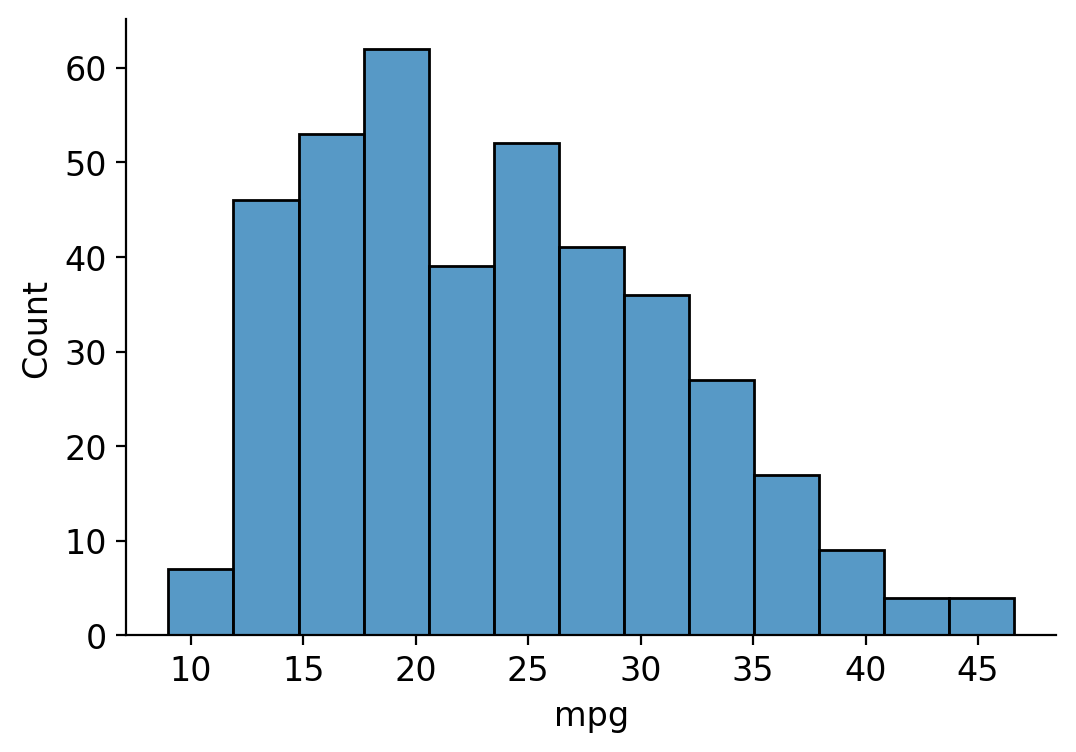

In [45]:
sns.histplot(
df.mpg
)

In [46]:
ppscores = pps.matrix( df ).set_index( ['x','y'] ).ppscore.values

Text(0.5, 24.444444444444432, 'tahminlenenler')

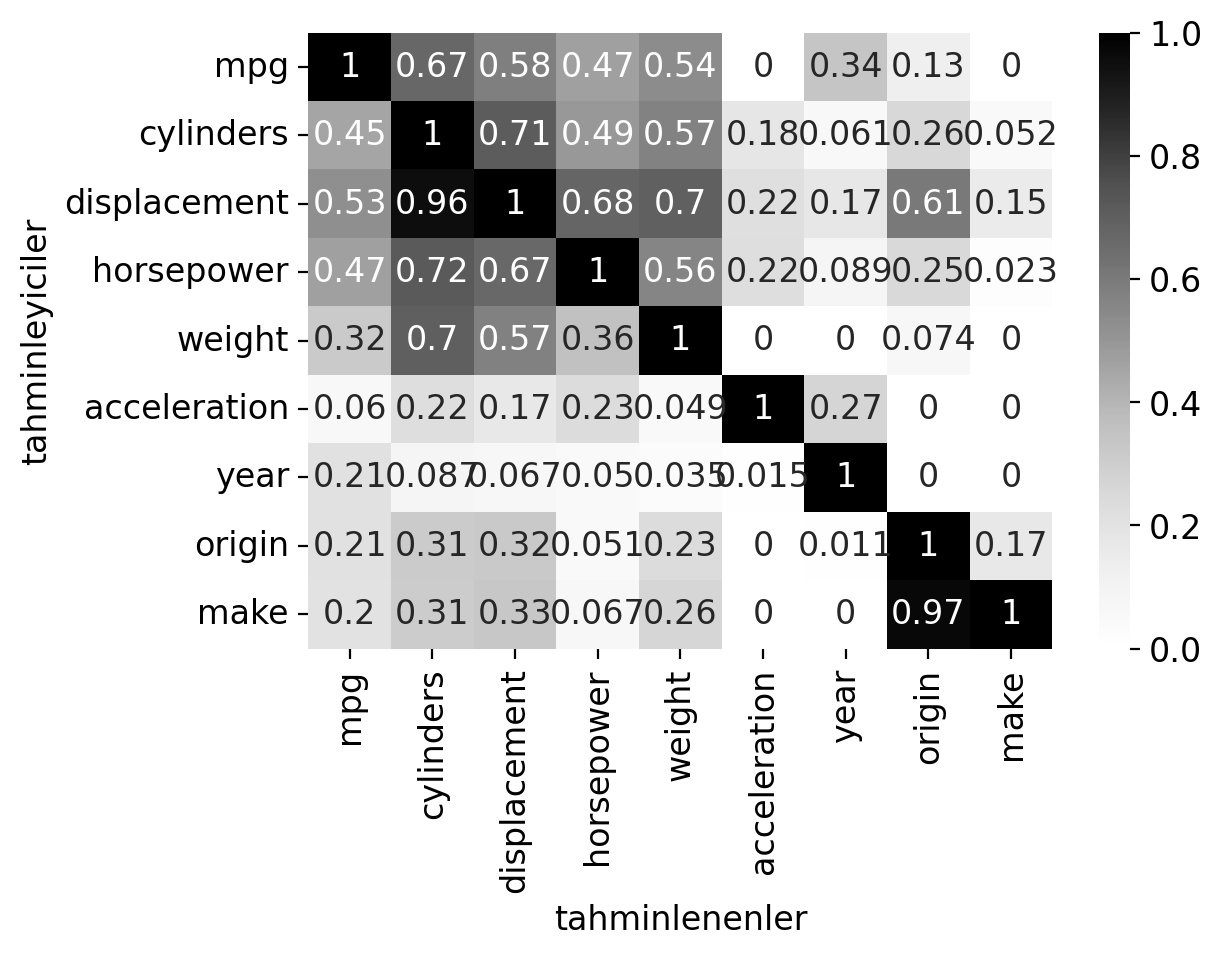

In [47]:
sns.heatmap(
pd.DataFrame(
            index = df.columns,
            columns = df.columns,
            data = ppscores.reshape(len(df.columns),len(df.columns))
            ),
annot = True,
cmap = 'Greys'
)

plt.ylabel('tahminleyiciler')
plt.xlabel('tahminlenenler')

In [48]:
y = df.mpg.values
X = df[ [i for i in df.columns if i != 'mpg'] ].values

In [86]:
idx_öğr = df.sample(frac = .8).index
idx_öğr

Int64Index([  7, 147,  28, 118, 345,  49, 153, 288, 164, 264,
            ...
            296,  92, 191, 331, 100,  72,  58, 171, 365, 123],
           dtype='int64', length=318)

In [87]:
idx_tst = [i for i in df.index if i not in idx_öğr]

In [88]:
y_öğr = df.mpg.loc[idx_öğr].values
X_öğr = df[ [i for i in df.columns if i != 'mpg' ] ].loc[idx_öğr].values

y_tst = df.mpg.loc[idx_tst].values
X_tst = df[ [i for i in df.columns if i != 'mpg' ] ].loc[idx_tst].values

In [89]:
from sklearn.neighbors import KNeighborsRegressor as KNN

model = KNN(n_neighbors = 10).fit( X = X_öğr, y = y_öğr )


In [90]:
y_tah = model.predict( X_tst )

In [91]:
from sklearn.metrics import mean_squared_error as mse

mse( y_tst, y_tah )

11.235087341772154

<Axes: >

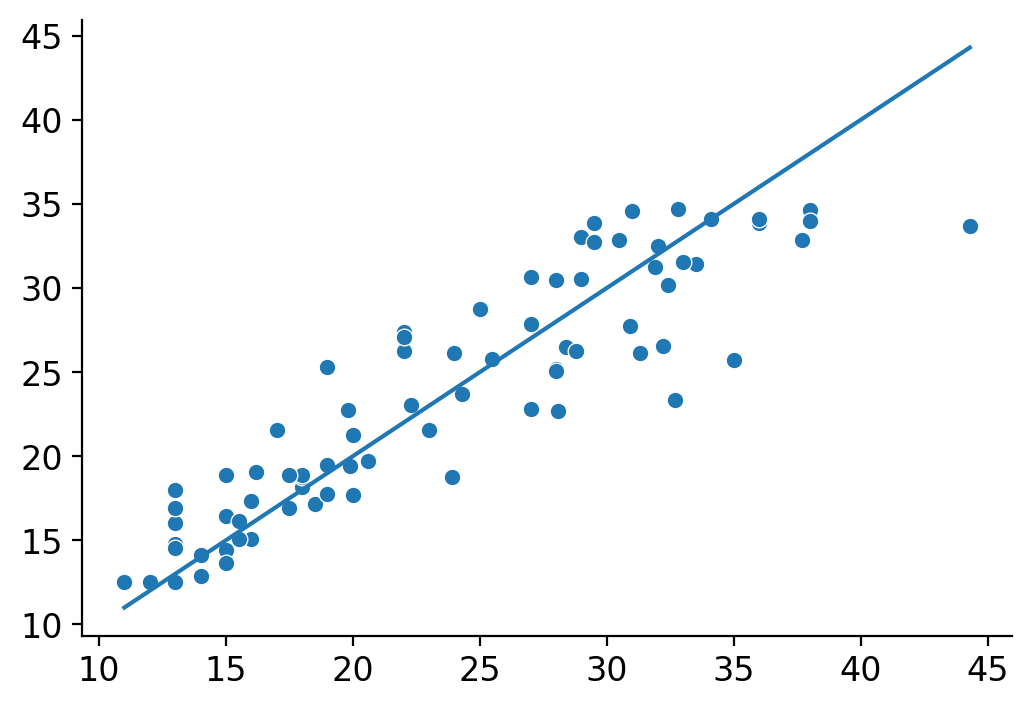

In [92]:
sns.scatterplot(
x = y_tst,
y = y_tah
)

sns.lineplot(
x = y_tst,
y = y_tst
)

In [93]:
kayıt = {}
for k in range(1,len(y_öğr)):
  model = KNN(n_neighbors = k).fit( X = X_öğr, y = y_öğr )

  y_tah = model.predict( X_tst )

  kayıt[k] = mse( y_tst, y_tah )

k = pd.Series(kayıt).sort_values().index[0]

model = KNN(n_neighbors = k).fit( X = X_öğr, y = y_öğr )
y_tah = model.predict( X_tst )

<Axes: >

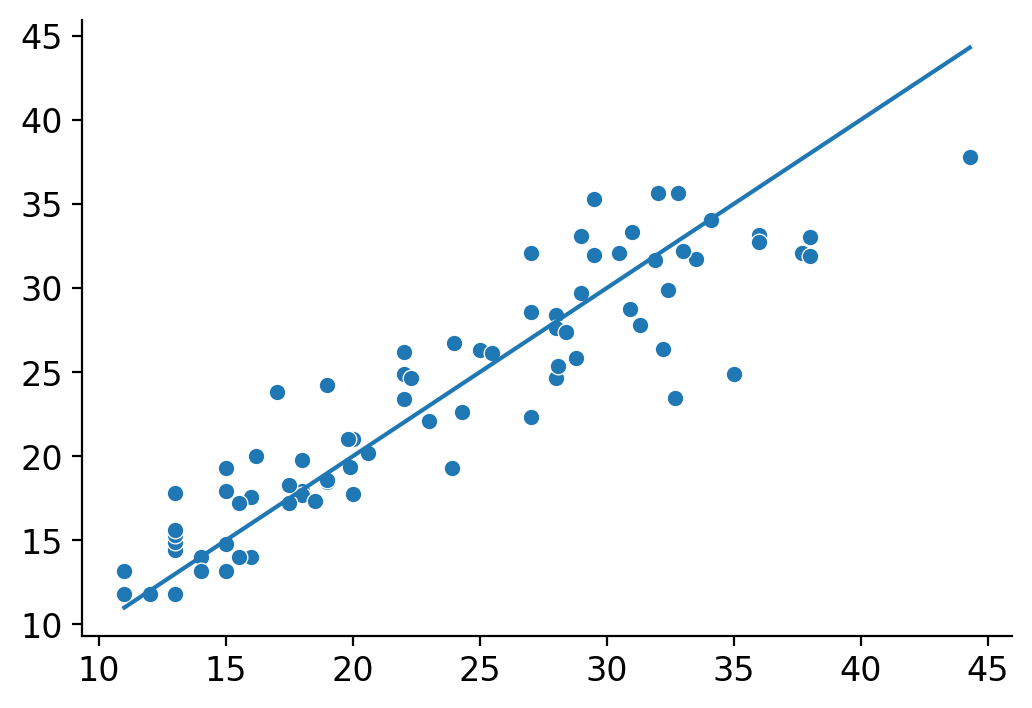

In [94]:
sns.scatterplot(
x = y_tst,
y = y_tah
)

sns.lineplot(
x = y_tst,
y = y_tst
)

In [97]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_öğr,y_öğr)

y_tah = model.predict( X_tst )

mse( y_tst, y_tah )

6.123566455696193

<Axes: >

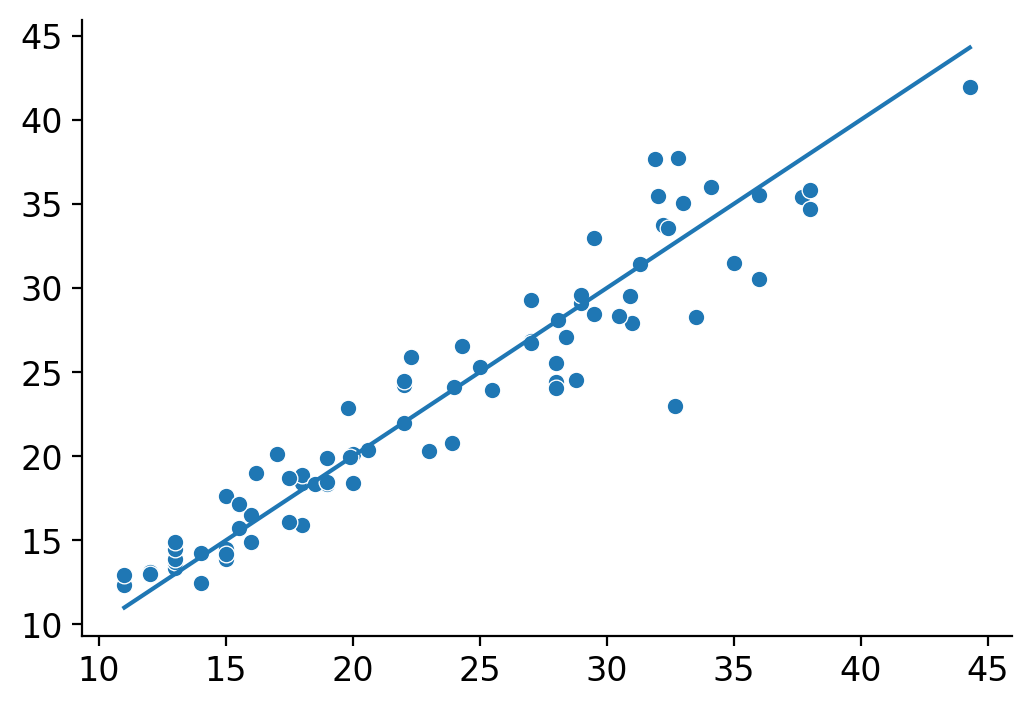

In [98]:
sns.scatterplot(
x = y_tst,
y = y_tah
)

sns.lineplot(
x = y_tst,
y = y_tst
)